## Image augmentation

When you do not have enough data - make more!

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import glob
from helpers import *
from copy import deepcopy

***Load and resize images***

In [28]:
# Load raw images
books, book_size = import_images(path='books/')
cups, cup_size = import_images(path='henriks_images/Cups/')
boxes, box_size = import_images(path='henriks_images/Boxes/')

# Resize images before augmentation - saves computing power
output_size=128 # 128x128 images
_, small_cups = resize_and_flatten(cups, padding=False, max_size=cup_size, output_size=output_size)
_, small_boxes = resize_and_flatten(boxes, padding=False, max_size=box_size, output_size=output_size)
_, small_books = resize_and_flatten(books, padding=False, max_size=book_size, output_size=output_size)

***Take a look at what we got***

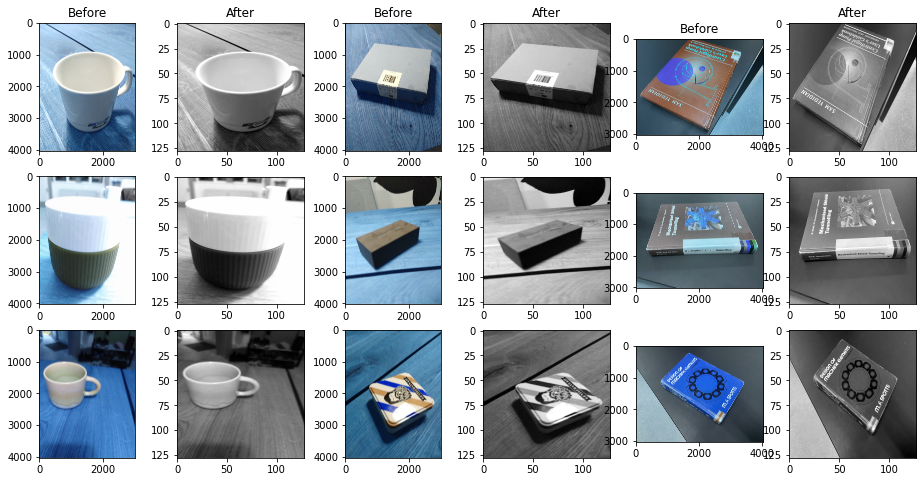

In [30]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(16, 8))
# Cups
axs[0, 0].set_title("Before")
axs[0, 1].set_title("After")
axs[0, 0].imshow(cups[0])
axs[0, 1].imshow(small_cups[0], cmap="gray")
axs[1, 0].imshow(cups[120])
axs[1, 1].imshow(small_cups[120], cmap="gray")
axs[2, 0].imshow(cups[-1])
axs[2, 1].imshow(small_cups[-1], cmap="gray");
# Boxes
axs[0, 2].set_title("Before")
axs[0, 3].set_title("After")
axs[0, 2].imshow(boxes[0])
axs[0, 3].imshow(small_boxes[0], cmap="gray")
axs[1, 2].imshow(boxes[120])
axs[1, 3].imshow(small_boxes[120], cmap="gray")
axs[2, 2].imshow(boxes[-1])
axs[2, 3].imshow(small_boxes[-1], cmap="gray");
# Books
axs[0, 4].set_title("Before")
axs[0, 5].set_title("After")
axs[0, 4].imshow(books[0])
axs[0, 5].imshow(small_books[0], cmap="gray")
axs[1, 4].imshow(books[120])
axs[1, 5].imshow(small_books[120], cmap="gray")
axs[2, 4].imshow(books[-1])
axs[2, 5].imshow(small_books[-1], cmap="gray");

### Data augmentation
- Rotation
- Shifting
- Flipping
- Noise & Blurr
- Invert colors?

In [31]:
from helpers import *
%run helpers.py

In [32]:
def augment_images(images,
                    operations=["flip", "blur", "rotate"], # Accumelate augmentations
                    acc = [False, False, False], # Accumelation or not
                    vertical=False, horizontal=True, # Flip
                    angle=15, # Rotate
                    sigma=0.5, octaves=3 # Blur
                    ):
    augmented = []
    for i, op in enumerate(operations):
        
        if op=="flip":
            if acc[i]:
                augmented += flipper(imgs=images+augmented, vertical=vertical, horizontal=horizontal)
            else:
                augmented += flipper(imgs=images, vertical=vertical, horizontal=horizontal)
        elif op=="blur":
            if acc[i]:
                augmented += scaleSpaced(imgs=images+augmented, sigma=sigma, n=octaves)
            else:
                augmented += scaleSpaced(imgs=images, sigma=sigma, n=octaves)
        elif op=="rotate":
            if acc[i]:
                augmented += rotate_imgs(imgs=images+augmented, angle=angle)
                augmented += rotate_imgs(imgs=images+augmented, angle=-angle)
            else:
                augmented += rotate_imgs(imgs=images, angle=angle)
                augmented += rotate_imgs(imgs=images, angle=-angle)
        else:
            raise Exception("Invalid operation", operations)
            
    return augmented



***Using "acuumelate" we can go from 2->62 images!***

**Have not yet implemented** shifting, interpolation or grey noise.

Now lets run it for all images and store the results.

In [33]:
augmented_cups = augment_images(small_cups,
                    operations=["blur",], #operations=["flip", "rotate", "blur",], # Accumelate augmentationstions
                    acc = [False], #acc = [False, False, True], # Accumelation or not
                    vertical=False, horizontal=True, # Flip
                    angle=15, # Rotate
                    sigma=0.4, octaves=3 # Blur
                    )

# Also add original images ? 
#augmented_cups += deepcopy(small_cups)
print(len(small_cups),"-->", len(augmented_cups))

198 --> 594


In [34]:
augmented_boxes = augment_images(small_boxes,
                    operations=["blur",], #operations=["flip", "rotate", "blur",], # Accumelate augmentationstions
                    acc = [False], #acc = [False, False, True], # Accumelation or not
                    vertical=False, horizontal=True, # Flip
                    angle=15, # Rotate
                    sigma=0.4, octaves=3 # Blur
                    )

# Also add original images ? 
#augmented_boxes += deepcopy(small_boxes)
print(len(small_boxes),"-->", len(augmented_boxes))

256 --> 768


In [35]:
augmented_books = augment_images(small_books,
                    operations=["blur",], #operations=["flip", "rotate", "blur",], # Accumelate augmentationstions
                    acc = [False], #acc = [False, False, True], # Accumelation or not
                    vertical=False, horizontal=True, # Flip
                    angle=15, # Rotate
                    sigma=0.4, octaves=3 # Blur
                    )

# Also add original images ? 
#augmented_cups += deepcopy(small_cups)
print(len(small_books),"-->", len(augmented_books))

218 --> 654


### Store images

In [36]:
store_images(augmented_boxes, path='henriks_images/augment_box/')
store_images(augmented_cups, path='henriks_images/augment_cup/')
store_images(augmented_books, path='henriks_images/augment_book/')

(768, 128, 128)
(594, 128, 128)
(654, 128, 128)
